# 爬虫框架
- 框架
- 爬虫框架
	- scrapy
	- pyspider
	- crawley
- scrapy框架介绍
	- https://doc.scrapy.org/en/latest/
	- http://scrapy-chs.readthedocs.io/zh_CN/latest/index.html
- 安装
	- 利用pip
- scrapy概述
	- 包含各个部件
		- ScrapyEngine： 神经中枢，大脑，核心、
		- Scheduler调度器：引擎发来的request请求，调度器需要处理，然后交换引擎
		- Downloader下载器：把引擎发来的requests发出请求，得到response
		- Spider爬虫： 负责把下载器得到的网页/结果进行分解，分解成数据+链接
		- ItemPipeline管道： 详细处理Item
		- DownloaderMiddleware下载中间件： 自定义下载的功能扩展组件
		- SpiderMiddleware爬虫中间件：对spider进行功能扩展
- 爬虫项目大概流程
	- 新建项目：scrapy startproject xxx
	- 明确需要目标/产出：编写item.py
	- 制作爬虫：地址 spider/xxspider.py
	- 存储内容：pipelines.py
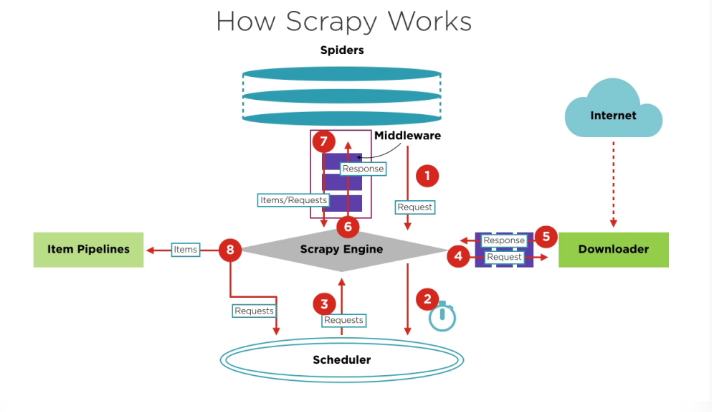

- ItemPipeline
	- 对应的是pipelines文件
	- 爬虫提取出数据存入item后，item中保存的数据需要进一步处理，比如清洗，去重，存储等
	- process_item:
		- spider提取出来的item作为参数传入，同时传入的还有spider
		- 此方法必须实现
		- 必须返回一个Item对象，被丢弃的item不会被之后的pipeline处理
	- init:构造函数
		- 进行一些必要的参数初始化
	- open_spider(spider):
		- spider对象被开启的时候调用
	- close_spider(spider):
		- 当spider对象被关闭的时候调用
        
        
- Spider
	- 对应的是文件夹spiders下的文件
	- init: 初始化爬虫名称，start_urls列表
	- start_requests:生成Requests对象交给Scrapy下载并返回response
	- parse： 根据返回的response解析出相应的item，item自动进入pipeline； 如果需要，解析出url，url自动交给 requests模块，一直循环下去
	- start_request: 此方法仅能被调用一次，读取start_urls内容并启动循环过程
	- name:设置爬虫名称
	- start_urls: 设置开始第一批爬取的url
	- allow_domains:spider允许爬去的域名列表
	- start_request(self)： 只被调用一次
	- parse
	- log:日志记录
    
    
- 中间件(DownloaderMiddlewares)
	- 中间件是处于引擎和下载器中间的一层组件
	- 可以有很多个，被按顺序加载执行
	- 作用是对发出的请求和返回的结果进行预处理
	- 在middlewares文件中
	- 需要在settings中设置以便生效
	- 一般一个中间件完成一项功能
	- 必须实现以下一个或者多个方法
		- process_request(self, request, spider)
			- 在request通过的时候被调用
			- 必须返回None或Response或Request或raise IgnoreRequest
			- None: scrapy将继续处理该request
			- Request： scrapy会停止调用process_request并冲洗调度返回的reqeust
			- Response： scrapy不会调用其他的process_request或者process_exception，直接讲该response作为结果返回 同时会调用process_response函数
	- process_response(self, request, response, spider)
		- 跟process_request大同小异
		- 每次返回结果的时候会自动调用
		- 可以有多个，按顺序调用
	- 案例代码